# Classification

#### Decision Tree

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

In [2]:
CSV_PATH = 'C:/Users/User/Desktop/Intro to DA/Dataset/DALAB Datasets for Training - travel.csv'
df = pd.read_csv(CSV_PATH)

In [3]:
df

,case_id,available,interesting_place,price,close_friend,go_travel
0,1,yes,yes,cheap,yes,go
1,2,not_sure,no,expensive,yes,not_go
2,3,yes,no,free,yes,go
3,4,not_sure,yes,free,no,go
4,5,yes,no,expensive,no,not_go
5,6,not_sure,yes,cheap,no,not_go
6,7,yes,yes,free,no,go
7,8,not_sure,yes,expensive,yes,not_go


Train/Test datas preparation

In [4]:
df['available'] = df['available'].map({'yes':1,'not_sure':0})
df['interesting_place'] = df['interesting_place'].map({'yes':1,'no':0})
df['price'] = df['price'].map({'free':0,'cheap':1,'expensive':2})
df['close_friend'] = df['close_friend'].map({'yes':1,'no':0})


In [5]:
df

,case_id,available,interesting_place,price,close_friend,go_travel
0,1,1,1,1,1,go
1,2,0,0,2,1,not_go
2,3,1,0,0,1,go
3,4,0,1,0,0,go
4,5,1,0,2,0,not_go
5,6,0,1,1,0,not_go
6,7,1,1,0,0,go
7,8,0,1,2,1,not_go


In [6]:
t_dat = {'available':np.random.randint(2,size=len(df.columns)),'interesting_place':np.random.randint(2,size=len(df.columns)),'price':np.random.randint(3,size=len(df.columns)),'close_friend':np.random.randint(2,size=len(df.columns))}
t_df = pd.DataFrame(t_dat)

In [7]:
t_df

,available,interesting_place,price,close_friend
0,1,1,0,0
1,1,1,2,1
2,0,1,2,0
3,1,1,1,0
4,0,0,2,0
5,1,1,2,1


In [8]:
X = df[['available','interesting_place','price','close_friend']]
y = df['go_travel']
Z = t_df[['available','interesting_place','price','close_friend']]

Model Fitting

In [9]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

Predition

In [10]:
model.predict(X)
df['model_prediction'] = model.predict(X)


In [11]:
df

,case_id,available,interesting_place,price,close_friend,go_travel,model_prediction
0,1,1,1,1,1,go,go
1,2,0,0,2,1,not_go,not_go
2,3,1,0,0,1,go,go
3,4,0,1,0,0,go,go
4,5,1,0,2,0,not_go,not_go
5,6,0,1,1,0,not_go,not_go
6,7,1,1,0,0,go,go
7,8,0,1,2,1,not_go,not_go


In [12]:
model.predict(Z)
t_df['model_predict'] = model.predict(Z)

In [13]:
t_df

,available,interesting_place,price,close_friend,model_predict
0,1,1,0,0,go
1,1,1,2,1,not_go
2,0,1,2,0,not_go
3,1,1,1,0,go
4,0,0,2,0,not_go
5,1,1,2,1,not_go


In [14]:
tree_text = export_text(model)
for i in range(len(X.columns)):
    tree_text = tree_text.replace('feature_'+str(i),X.columns[i])
print(tree_text)

|--- price <= 0.50
|   |--- class: go
|--- price >  0.50
|   |--- price <= 1.50
|   |   |--- available <= 0.50
|   |   |   |--- class: not_go
|   |   |--- available >  0.50
|   |   |   |--- class: go
|   |--- price >  1.50
|   |   |--- class: not_go



# Regression

### Linear Regression

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [16]:
CSV_PATH = 'C:/Users/User/Desktop/Intro to DA/Dataset/DALAB Datasets for Training - condo.csv'
df = pd.read_csv(CSV_PATH)

In [17]:
df

,room_id,sqm,river_side,far_rrt_m,time_to_siam_m,price_m_jade,price_m
0,1,30,1,300,30,8.8,2.2
1,2,30,0,100,60,6.9,2.5
2,3,40,1,200,40,9.9,3.0
3,4,40,0,100,30,7.9,3.5
4,5,40,1,500,50,9.5,2.8
5,6,60,0,300,15,11.0,5.0
6,7,60,1,1000,60,12.0,4.0
7,8,60,0,200,40,12.9,4.5


In [18]:
X = df[['sqm','river_side','far_rrt_m','time_to_siam_m']]
y = df['price_m']

In [19]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [20]:
print("LM MODEL")
print("")
print(y.name, "=")
for i in range(0,len(X.columns)):
  print("", round(model.coef_[i],3),"*",X.columns[i],"   +")
print("", round(model.intercept_,3))

LM MODEL

price_m =
 0.065 * sqm    +
 -0.464 * river_side    +
 0.0 * far_rrt_m    +
 -0.011 * time_to_siam_m    +
 1.179


In [21]:
model.predict(X)

array([2.34564249, 2.4748824 , 2.88284229, 3.45366427, 2.78270612,
       4.92431295, 3.98880911, 4.64714038])

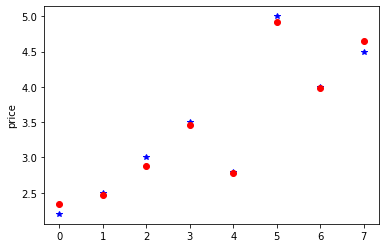

In [32]:
import matplotlib.pyplot as plt
plt.plot(y,'*', color='blue')
plt.ylabel('price')
plt.plot(model.predict(X),'o', color='red')

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,model.predict(X),squared=False)

0.09049771595579702